In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [1]:
%cd yolov5

/notebooks/yolov5


In [5]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [1]:
%cd yolov5

/notebooks/yolov5


In [3]:
import torch
torch.cuda.empty_cache()
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [5]:
model = torch.hub.load('ultralytics/yolov5','yolov5s',pretrained = True)

/usr/local/lib/python3.9/dist-packages/torch/hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-10-5 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro M4000, 8127MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
!python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-181-g8a19437 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro M4000, 8127MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

In [11]:
!python train.py --img 640 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-181-g8a19437 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro M4000, 8127MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'runs/train/exp13/weights/best.pt', force_reload = True)

/usr/local/lib/python3.9/dist-packages/torch/hub.py:266: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2022-11-10 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro M4000, 8127MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients
Adding AutoShape... 


In [1]:
img = '/notebooks/data/images/Pink_Background_5.png'

In [4]:
print(model)

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

In [5]:
import torch
import torch.nn as nn
import torchvision
from torchvision import models, transforms, utils
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
from PIL import Image
import json
%matplotlib inline

In [9]:
!python detect.py --weights 'runs/train/exp13/weights/best.pt' --source '/notebooks/data/images/Black_Background_1.png' --visualize

detect: weights=['runs/train/exp13/weights/best.pt'], source=/notebooks/data/images/Black_Background_1.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=True, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v6.2-181-g8a19437 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro M4000, 8127MiB)

Fusing layers... 
Model summary: 157 layers, 7018216 parameters, 0 gradients
Saving runs/detect/exp4/Black_Background_1/stage0_Conv_features.png... (32/32)
Saving runs/detect/exp4/Black_Background_1/stage1_Conv_features.png... (32/64)
Saving runs/detect/exp4/Black_Background_1/stage2_C3_features.png... (32/64)
Saving runs/detect/exp4/Black_Background_1/stage3_Conv_features.png... (32/128)
Saving runs/de

In [8]:
results = model(img)

In [9]:
import pandas

In [10]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,865.357727,202.517365,1118.159668,398.569885,0.962047,0,Corner
1,298.269592,534.983459,542.136780,751.180054,0.960340,1,Side
2,246.125107,324.052673,488.782562,517.347534,0.954972,0,Corner
3,752.213623,718.852478,999.332153,937.986328,0.953357,0,Corner
4,1286.193726,280.719269,1559.668945,480.133759,0.952185,2,Centre
5,1281.219482,624.071289,1523.990356,828.804016,0.945315,1,Side
6,1158.542969,84.616356,1374.264404,271.119293,0.944783,0,Corner
7,1124.377197,842.231934,1330.465210,1129.387451,0.942650,1,Side
8,1023.703979,520.867493,1229.672852,728.299683,0.940979,2,Centre
9,397.618286,857.180603,640.479736,1095.556641,0.934218,0,Corner


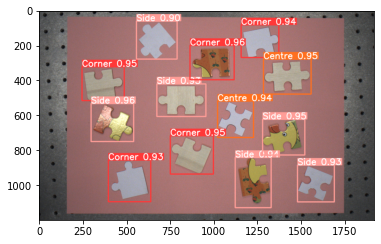

In [11]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [12]:
dataframe = results.pandas().xyxy[0]

In [13]:
print(dataframe)

           xmin        ymin         xmax         ymax  confidence  class  \
0    865.357727  202.517365  1118.159668   398.569885    0.962047      0   
1    298.269592  534.983459   542.136780   751.180054    0.960340      1   
2    246.125107  324.052673   488.782562   517.347534    0.954972      0   
3    752.213623  718.852478   999.332153   937.986328    0.953357      0   
4   1286.193726  280.719269  1559.668945   480.133759    0.952185      2   
5   1281.219482  624.071289  1523.990356   828.804016    0.945315      1   
6   1158.542969   84.616356  1374.264404   271.119293    0.944783      0   
7   1124.377197  842.231934  1330.465210  1129.387451    0.942650      1   
8   1023.703979  520.867493  1229.672852   728.299683    0.940979      2   
9    397.618286  857.180603   640.479736  1095.556641    0.934218      0   
10   675.250244  422.051819   956.759155   608.313843    0.931404      1   
11  1481.344238  886.430176  1692.485107  1096.927490    0.930714      1   
12   558.173

In [15]:
print(dataframe[dataframe['class'] == 0]['name'].count())
print(dataframe[dataframe['class'] == 1]['name'].count())
print(dataframe[dataframe['class'] == 2]['name'].count())

5
6
2


In [24]:
Corners_df = dataframe[dataframe['class'] == 0]

In [17]:
Side_df = dataframe[dataframe['class'] == 1]

In [18]:
Centre_df = dataframe[dataframe['class'] == 2]

In [19]:
print(Side_df, Centre_df)

           xmin        ymin         xmax         ymax  confidence  class  name
1    298.269592  534.983459   542.136780   751.180054    0.960340      1  Side
5   1281.219482  624.071289  1523.990356   828.804016    0.945315      1  Side
7   1124.377197  842.231934  1330.465210  1129.387451    0.942650      1  Side
10   675.250244  422.051819   956.759155   608.313843    0.931404      1  Side
11  1481.344238  886.430176  1692.485107  1096.927490    0.930714      1  Side
12   558.173706   63.776550   791.424805   280.604675    0.900413      1  Side           xmin        ymin         xmax        ymax  confidence  class    name
4  1286.193726  280.719269  1559.668945  480.133759    0.952185      2  Centre
8  1023.703979  520.867493  1229.672852  728.299683    0.940979      2  Centre


In [25]:
Corners_df

,xmin,ymin,xmax,ymax,confidence,class,name
0,865.357727,202.517365,1118.159668,398.569885,0.962047,0,Corner
2,246.125107,324.052673,488.782562,517.347534,0.954972,0,Corner
3,752.213623,718.852478,999.332153,937.986328,0.953357,0,Corner
6,1158.542969,84.616356,1374.264404,271.119293,0.944783,0,Corner
9,397.618286,857.180603,640.479736,1095.556641,0.934218,0,Corner


In [4]:
model = torch.hub.load('ultralytics/yolov5','yolov5m6', pretrained=True)

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-10-5 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro M4000, 8127MiB)

Fusing layers... 
YOLOv5m6 summary: 378 layers, 35704908 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
!python train.py --img 640 --batch 16 --epochs 500 --data dataset.yml --weights yolov5m6.pt

train: weights=yolov5m6.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
Command 'git fetch origin' timed out after 5 seconds
YOLOv5 🚀 v6.2-181-g8a19437 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro M4000, 8127MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degree

In [7]:
!python train.py --img 720 --batch 16 --epochs 350 --data dataset.yml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=350, batch_size=16, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: ⚠️ YOLOv5 is out of date by 8 commits. Use `git pull` or `git clone https://github.com/ultralytics/yolov5` to update.
YOLOv5 🚀 v6.2-181-g8a19437 Python-3.9.13 torch-1.12.0+cu116 CUDA:0 (Quadro M4000, 8127MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.